In [1]:
# Importing liberary
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Read the data as a data frame

df = pd.read_excel('input_data.xlsx')

In [3]:
#Printing the head
df.head(5)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [4]:
#Shape and size of tghe data
print(df.shape)
print(df.size)

(8500, 4)
34000


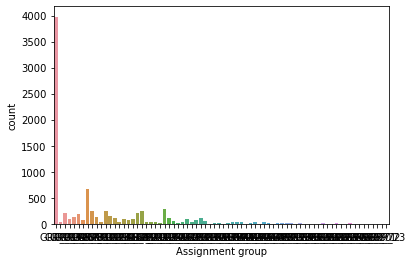

In [5]:
#Count plot of target group
import seaborn as sns
sns.countplot(df["Assignment group"])

In [6]:
#checking data types
df.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
dtype: object

In [7]:
#Finding the no of missing values 
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [8]:
df.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [10]:
df["Assignment group"].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_35       1
GRP_73       1
GRP_61       1
GRP_64       1
GRP_67       1
Name: Assignment group, Length: 74, dtype: int64

In [11]:
#Dropping Caller ID
df.drop(["Caller"], axis = 1, inplace = True) 

In [12]:
#Finding the percentage of data
group_percent=(df["Assignment group"].value_counts(normalize=True)*100)
print(group_percent)

GRP_0     46.776471
GRP_8      7.776471
GRP_24     3.400000
GRP_12     3.023529
GRP_9      2.964706
            ...    
GRP_35     0.011765
GRP_73     0.011765
GRP_61     0.011765
GRP_64     0.011765
GRP_67     0.011765
Name: Assignment group, Length: 74, dtype: float64


Pre Processing

In [13]:
import nltk
import string
import re

In [14]:
import imblearn
print(imblearn.__version__)



0.7.0


In [15]:
!pip install wordcloud

In [16]:
#Wordcloud
from wordcloud import WordCloud, STOPWORDS

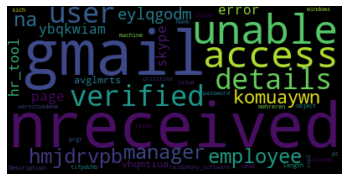

In [17]:
wordcloud = WordCloud().generate(str(df["Description"]))
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 599.5, 399.5, -0.5)

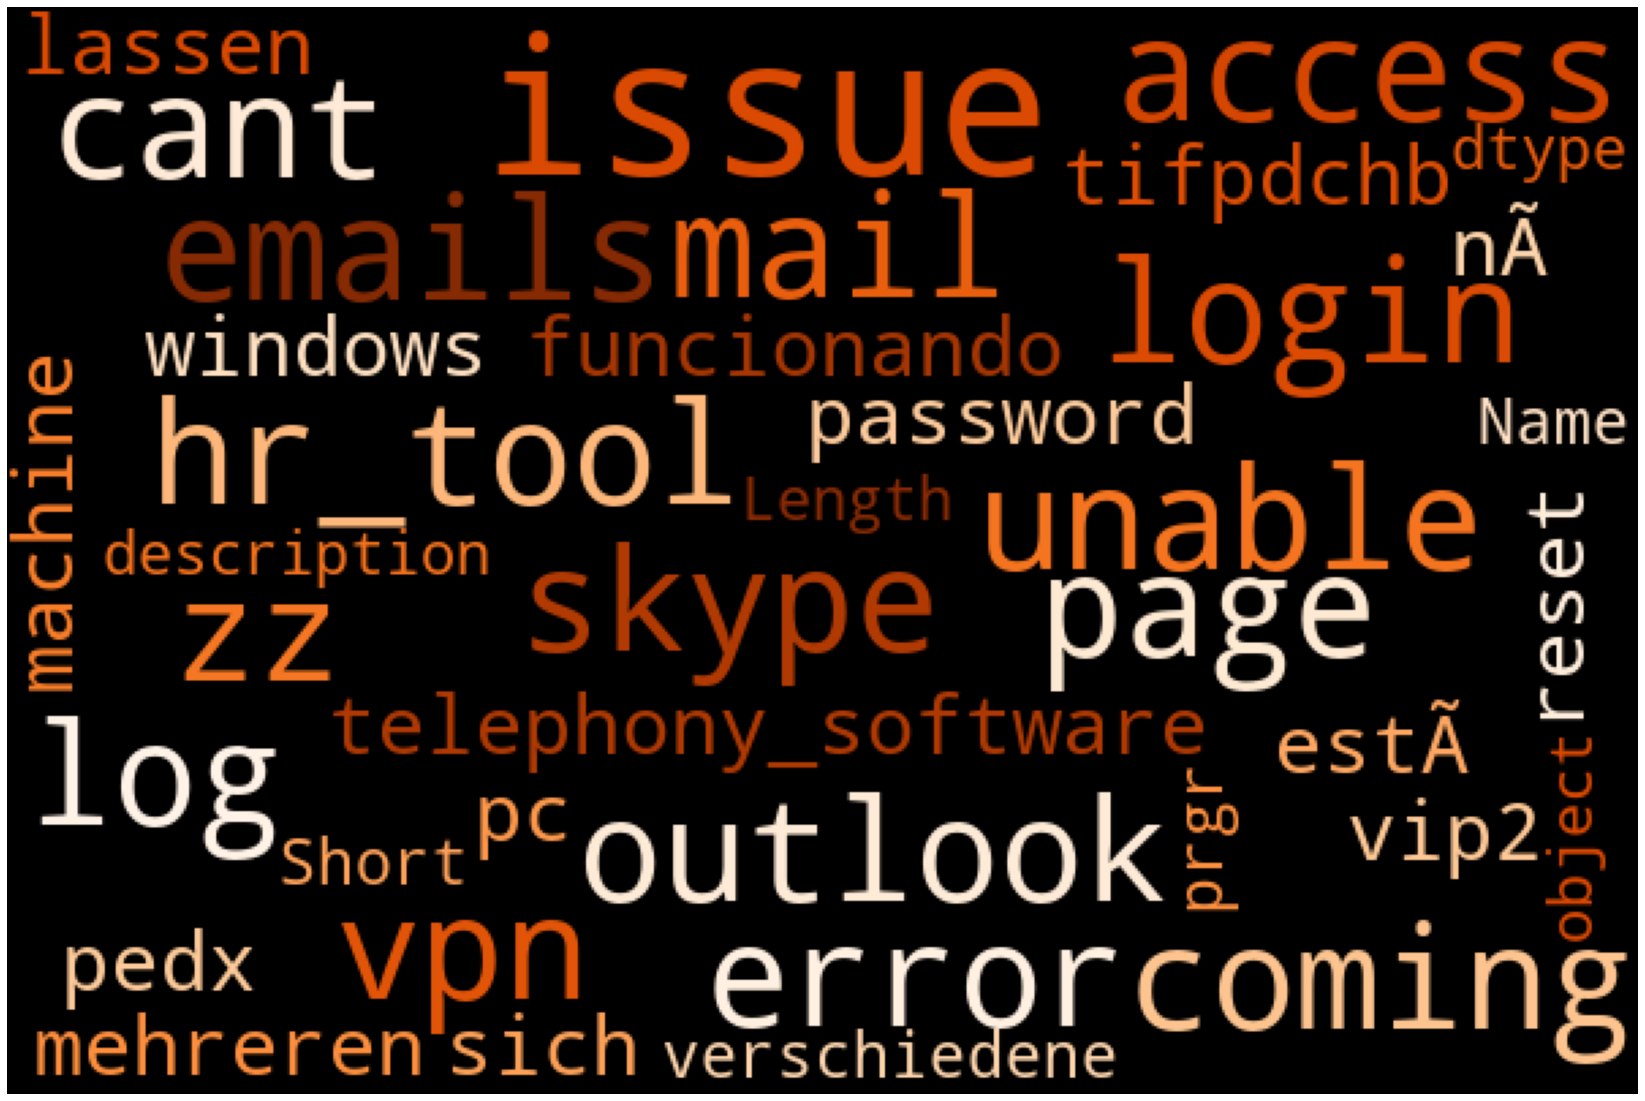

In [18]:
img = WordCloud(width = 600, height = 400, 
               background_color = 'black', colormap = 'Oranges',
               max_font_size=70,
               random_state=42).generate(str(df["Short description"]))

plt.figure(figsize=(30,20))
plt.imshow(img)
plt.axis('off')

In [19]:
!pip install nltk

In [20]:
df['word_count'] = df['Short description'].apply(lambda x: len(str(x).split(" ")))
df[['Short description', 'word_count']].head(5)

,Short description,word_count
0,login issue,2
1,outlook,1
2,cant log in to vpn,5
3,unable to access hr_tool page,5
4,skype error,3


In [21]:
df['word_count1'] = df['Description'].apply(lambda x: len(str(x).split(" ")))
df[['Description', 'word_count1']].head(5)

,Description,word_count1
0,-verified user details.(employee# & manager na...,29
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,23
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,9
3,unable to access hr_tool page,5
4,skype error,3


In [22]:
df['char_count'] =  df['Description'].str.len()
df[['Description', 'char_count']].head(5)

,Description,char_count
0,-verified user details.(employee# & manager na...,206.0
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,194.0
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,87.0
3,unable to access hr_tool page,29.0
4,skype error,12.0


In [23]:
df['char_count1'] =  df['Short description'].str.len()
df[['Short description', 'char_count1']].head(5)

,Short description,char_count1
0,login issue,11.0
1,outlook,7.0
2,cant log in to vpn,18.0
3,unable to access hr_tool page,29.0
4,skype error,12.0


In [24]:
from nltk.corpus import stopwords

In [25]:
#Checking stopweords in short description
stop =  stopwords.words('english')
df['stopwords'] = df['Short description'].astype(str).apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Short description', 'stopwords']].head(5)

,Short description,stopwords
0,login issue,0
1,outlook,0
2,cant log in to vpn,2
3,unable to access hr_tool page,1
4,skype error,0


In [26]:
#Checking stopweords in  Description
stop =  stopwords.words('english')
df['stopwords1'] = df['Description'].astype(str).apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Description', 'stopwords1']].head(5)

,Description,stopwords1
0,-verified user details.(employee# & manager na...,11
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,8
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,3
3,unable to access hr_tool page,1
4,skype error,0


In [27]:
#Checking special characters
punc = string.punctuation
df['specialchar'] = df['Description'].astype(str).apply(lambda x: len([x for x in x.split() if x not in punc]))
df[['Description', 'specialchar']].head(5)

,Description,specialchar
0,-verified user details.(employee# & manager na...,32
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,25
2,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,11
3,unable to access hr_tool page,5
4,skype error,2


In [28]:
#Checking special characters
punc = string.punctuation
df['specialchar1'] = df['Short description'].astype(str).apply(lambda x: len([x for x in x.split() if x not in punc]))
df[['Short description', 'specialchar1']].head(5)

,Short description,specialchar1
0,login issue,2
1,outlook,1
2,cant log in to vpn,5
3,unable to access hr_tool page,5
4,skype error,2


In [29]:
#Changing to Lower case Short description
df['Short description'] = df['Short description'].astype(str).apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Short description'].head(5)

0                      login issue
1                          outlook
2               cant log in to vpn
3    unable to access hr_tool page
4                      skype error
Name: Short description, dtype: object

In [30]:
#Changing to Lower case  Description
df['Description'] = df['Description'].astype(str).apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Description'].head(5)

0    -verified user details.(employee# & manager na...
1    received from: hmjdrvpb.komuaywn@gmail.com hel...
2    received from: eylqgodm.ybqkwiam@gmail.com hi ...
3                        unable to access hr_tool page
4                                          skype error
Name: Description, dtype: object

In [31]:
#Removing Punctuation Short Description
df['Short description'] =  df['Short description'].str.replace('[^\w\s]','')
df['Short description'].head()

0                      login issue
1                          outlook
2               cant log in to vpn
3    unable to access hr_tool page
4                      skype error
Name: Short description, dtype: object

In [32]:
#Removing Punctuation  Description
df['Description'] =  df['Description'].str.replace('[^\w\s]','')
df['Description'].head()

0    verified user detailsemployee  manager name ch...
1    received from hmjdrvpbkomuaywngmailcom hello t...
2    received from eylqgodmybqkwiamgmailcom hi i ca...
3                        unable to access hr_tool page
4                                          skype error
Name: Description, dtype: object

In [33]:
#Removal of stop words
stop =  stopwords.words('english')
df['Short description'] =  df['Short description'].astype(str).apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Short description'].head()

0                   login issue
1                       outlook
2                  cant log vpn
3    unable access hr_tool page
4                   skype error
Name: Short description, dtype: object

In [34]:
stop =  stopwords.words('english')
df['Description'] =  df['Description'].astype(str).apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Description'].head()

0    verified user detailsemployee manager name che...
1    received hmjdrvpbkomuaywngmailcom hello team m...
2    received eylqgodmybqkwiamgmailcom hi cannot lo...
3                           unable access hr_tool page
4                                          skype error
Name: Description, dtype: object

In [35]:
#Common words removal
freq = pd.Series(' '.join(df['Short description']).split()).value_counts()[:10]
freq

job              977
job_scheduler    959
password         875
erp              849
failed           827
unable           711
reset            692
account          497
issue            479
access           431
dtype: int64

In [36]:
freq = list(freq)
df['Short description'] = df['Short description'].astype(str).apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Short description'].head()

0                   login issue
1                       outlook
2                  cant log vpn
3    unable access hr_tool page
4                   skype error
Name: Short description, dtype: object

In [37]:
freq = pd.Series(' '.join(df['Description']).split()).value_counts()[:10]
freq

received                     2368
please                       1932
yesnona                      1567
password                     1170
user                         1158
erp                          1135
job                          1004
job_scheduler                 969
monitoring_toolcompanycom     961
failed                        906
dtype: int64

In [38]:
freq = list(freq)
df['Description'] = df['Description'].astype(str).apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Description'].head()

0    verified user detailsemployee manager name che...
1    received hmjdrvpbkomuaywngmailcom hello team m...
2    received eylqgodmybqkwiamgmailcom hi cannot lo...
3                           unable access hr_tool page
4                                          skype error
Name: Description, dtype: object

In [39]:
#Rare words removal
freq = pd.Series(' '.join(df['Short description']).split()).value_counts()[-10:]
freq

840pm              1
tgryhu             1
174                1
896105183          1
visitble           1
æåãçäè½éçµèæéšœ    1
em01               1
loginn             1
sbcheyu            1
tikona             1
dtype: int64

In [40]:
freq = list(freq)
df['Short description'] = df['Short description'].astype(str).apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Short description'].head()

0                   login issue
1                       outlook
2                  cant log vpn
3    unable access hr_tool page
4                   skype error
Name: Short description, dtype: object

In [41]:
freq = pd.Series(' '.join(df['Description']).split()).value_counts()[-10:]
freq

1152                             1
phillpd                          1
zu8                              1
r241                             1
kna                              1
emailzikuvsatspxycizrgmailcom    1
114400                           1
currencytable                    1
zvygmncos                        1
vendorclassification             1
dtype: int64

In [42]:
freq = list(freq)
df['Description'] = df['Description'].astype(str).apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Description'].head()

0    verified user detailsemployee manager name che...
1    received hmjdrvpbkomuaywngmailcom hello team m...
2    received eylqgodmybqkwiamgmailcom hi cannot lo...
3                           unable access hr_tool page
4                                          skype error
Name: Description, dtype: object

In [43]:
!pip install -U textblob

Requirement already up-to-date: textblob in c:\programdata\anaconda3\envs\gpu\lib\site-packages (0.15.3)


In [44]:
#spelling correction
from textblob import TextBlob
df['Short description'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                   login issue
1                       outlook
2                   can log van
3    unable access hr_tool page
4                    type error
Name: Short description, dtype: object

In [45]:
from textblob import TextBlob
df['Description'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    verified user detailsemployee manager name che...
1    received hmjdrvpbkomuaywngmailcom hello team m...
2    received eylqgodmybqkwiamgmailcom hi cannot lo...
3                           unable access hr_tool page
4                                           type error
Name: Description, dtype: object

In [46]:
def remove(rah):
    pattern="[0.9]"
    rah=[re.sub(pattern,'',i)for i in rah]
    return rah

In [47]:
df['Short description']=remove(df['Short description'])
df['Description']=remove(df['Description'])

In [48]:
from fuzzywuzzy import fuzz
for i, x in df.iterrows():
    df.loc[i,'col_similarity'] = fuzz.token_set_ratio(df.loc[i, 'Description'],df.loc[i,'Short description'])


C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [49]:
for i , x in df.iterrows():
    if df.loc[i,"col_similarity"]<=90:
        df.loc[i,"derived description"]= df.loc[i,"Description"]+ df.loc[i, "Short description"]
    else:
        df.loc[i,"derived description"]=df.loc[i,"Short description"]

In [50]:
df.head(5)

,Short description,Description,Assignment group,word_count,word_count1,char_count,char_count1,stopwords,stopwords1,specialchar,specialchar1,col_similarity,derived description
0,login issue,verified user detailsemployee manager name che...,GRP_0,2,29,206.0,11.0,0,11,32,2,100.0,login issue
1,outlook,received hmjdrvpbkomuaywngmailcom hello team m...,GRP_0,1,23,194.0,7.0,0,8,25,1,100.0,outlook
2,cant log vpn,received eylqgodmybqkwiamgmailcom hi cannot lo...,GRP_0,5,9,87.0,18.0,2,3,11,5,74.0,received eylqgodmybqkwiamgmailcom hi cannot lo...
3,unable access hr_tool page,unable access hr_tool page,GRP_0,5,5,29.0,29.0,1,1,5,5,100.0,unable access hr_tool page
4,skype error,skype error,GRP_0,3,3,12.0,12.0,0,0,2,2,100.0,skype error


In [51]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Assignment group']= label_encoder.fit_transform(df['Assignment group']) 
  
df['Assignment group'].unique() 

array([ 0,  1, 23, 34, 45, 56, 67, 72, 73,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 28,
       29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 26, 59, 60, 61, 62, 63, 64,
       65, 66, 68, 69, 70, 71])

In [52]:
#Tokenization
from nltk import word_tokenize
df['derived description'] = df['derived description'].apply(word_tokenize)
df['derived description'].head()

0                                       [login, issue]
1                                            [outlook]
2    [received, eylqgodmybqkwiamgmailcom, hi, can, ...
3                      [unable, access, hr_tool, page]
4                                       [skype, error]
Name: derived description, dtype: object

In [53]:
df.isnull().sum()

Short description      0
Description            0
Assignment group       0
word_count             0
word_count1            0
char_count             1
char_count1            8
stopwords              0
stopwords1             0
specialchar            0
specialchar1           0
col_similarity         0
derived description    0
dtype: int64

In [54]:
df['derived description'] = df['derived description'].astype(object)

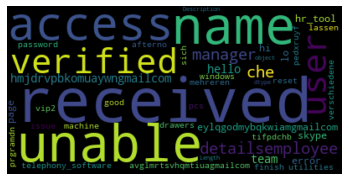

In [55]:
#Wordcloud
wordcloud = WordCloud().generate(str(df["Description"]))
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis("off")
plt.show()

In [56]:
df.head(15)

,Short description,Description,Assignment group,word_count,word_count1,char_count,char_count1,stopwords,stopwords1,specialchar,specialchar1,col_similarity,derived description
0,login issue,verified user detailsemployee manager name che...,0,2,29,206.0,11.0,0,11,32,2,100.0,"[login, issue]"
1,outlook,received hmjdrvpbkomuaywngmailcom hello team m...,0,1,23,194.0,7.0,0,8,25,1,100.0,[outlook]
2,cant log vpn,received eylqgodmybqkwiamgmailcom hi cannot lo...,0,5,9,87.0,18.0,2,3,11,5,74.0,"[received, eylqgodmybqkwiamgmailcom, hi, can, ..."
3,unable access hr_tool page,unable access hr_tool page,0,5,5,29.0,29.0,1,1,5,5,100.0,"[unable, access, hr_tool, page]"
4,skype error,skype error,0,3,3,12.0,12.0,0,0,2,2,100.0,"[skype, error]"
5,unable log engineering tool skype,unable log engineering tool skype,0,9,9,46.0,46.0,4,4,9,9,100.0,"[unable, log, engineering, tool, skype]"
6,event criticalhostname_221companycom value mou...,event criticalhostname_221companycom value mou...,1,10,11,153.0,105.0,3,4,11,9,85.0,"[event, criticalhostname_221companycom, value,..."
7,ticket_no15531 employment status new nonemploy...,ticket_no15531 employment status new nonemploy...,0,9,9,74.0,74.0,0,0,8,8,100.0,"[ticket_no15531, employment, status, new, none..."
8,unable disable add ins outlook,unable disable add ins outlook,0,7,7,36.0,36.0,2,2,7,7,100.0,"[unable, disable, add, ins, outlook]"
9,ticket update inplant_874773,ticket update inplant_874773,0,4,4,31.0,31.0,1,1,4,4,100.0,"[ticket, update, inplant_874773]"


In [57]:
df[df["col_similarity"]>=90].head(20)

,Short description,Description,Assignment group,word_count,word_count1,char_count,char_count1,stopwords,stopwords1,specialchar,specialchar1,col_similarity,derived description
0,login issue,verified user detailsemployee manager name che...,0,2,29,206.0,11.0,0,11,32,2,100.0,"[login, issue]"
1,outlook,received hmjdrvpbkomuaywngmailcom hello team m...,0,1,23,194.0,7.0,0,8,25,1,100.0,[outlook]
3,unable access hr_tool page,unable access hr_tool page,0,5,5,29.0,29.0,1,1,5,5,100.0,"[unable, access, hr_tool, page]"
4,skype error,skype error,0,3,3,12.0,12.0,0,0,2,2,100.0,"[skype, error]"
5,unable log engineering tool skype,unable log engineering tool skype,0,9,9,46.0,46.0,4,4,9,9,100.0,"[unable, log, engineering, tool, skype]"
7,ticket_no15531 employment status new nonemploy...,ticket_no15531 employment status new nonemploy...,0,9,9,74.0,74.0,0,0,8,8,100.0,"[ticket_no15531, employment, status, new, none..."
8,unable disable add ins outlook,unable disable add ins outlook,0,7,7,36.0,36.0,2,2,7,7,100.0,"[unable, disable, add, ins, outlook]"
9,ticket update inplant_874773,ticket update inplant_874773,0,4,4,31.0,31.0,1,1,4,4,100.0,"[ticket, update, inplant_874773]"
10,engineering tool says connected unable submit ...,engineering tool says connected unable submit ...,0,10,10,64.0,64.0,3,3,10,10,100.0,"[engineering, tool, says, connected, unable, s..."
11,hr_tool site loading page correctly,hr_tool site loading page correctly,0,6,6,39.0,39.0,1,1,6,6,100.0,"[hr_tool, site, loading, page, correctly]"


In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [59]:
target_distribution = df["Assignment group"].value_counts().rename_axis("Assignment_group").reset_index(name='counts')

In [60]:
target_distribution["percentage"] = target_distribution["counts"] / len(df.index) * 100.0

In [61]:
target_distribution.head(25)

,Assignment_group,counts,percentage
0,0,3976,46.776471
1,72,661,7.776471
2,17,289,3.400000
3,4,257,3.023529
4,73,252,2.964706
5,12,241,2.835294
6,11,215,2.529412
7,23,200,2.352941
8,56,184,2.164706
9,5,145,1.705882


In [62]:


target_distribution['cumulative_percentage'] = target_distribution['percentage'].cumsum(axis = 0)



In [63]:
less_popular_target_class = list(target_distribution[target_distribution["percentage"] < 0.50]["Assignment_group"])

In [64]:


len(less_popular_target_class)



48

In [65]:
target_distribution[target_distribution["Assignment_group"] == 'GRP_52']

C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Assignment_group,counts,percentage,cumulative_percentage


In [66]:
less_popular_target_class

[36,
 24,
 7,
 37,
 13,
 40,
 15,
 1,
 3,
 14,
 42,
 16,
 43,
 59,
 57,
 33,
 20,
 31,
 39,
 30,
 46,
 49,
 62,
 48,
 47,
 51,
 55,
 44,
 41,
 38,
 63,
 26,
 54,
 65,
 52,
 60,
 32,
 70,
 66,
 53,
 50,
 69,
 64,
 58,
 61,
 68,
 29,
 71]

In [67]:



def update_target_class(target):
    if target in less_popular_target_class:
        updated_target = 52
    else:
        updated_target = target 
    return updated_target


In [68]:
update_target_class("GRP_67")

'GRP_67'

In [69]:


df["updated_target"] = list(map(update_target_class, df["Assignment group"]))



In [70]:
len(df["Assignment group"].unique()), len(df["updated_target"].unique())

(74, 27)

In [71]:


# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Assignment group']= label_encoder.fit_transform(df['Assignment group']) 
  
df['Assignment group'].unique() 

array([ 0,  1, 23, 34, 45, 56, 67, 72, 73,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 28,
       29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 26, 59, 60, 61, 62, 63, 64,
       65, 66, 68, 69, 70, 71], dtype=int64)

In [72]:
df.head(25)

,Short description,Description,Assignment group,word_count,word_count1,char_count,char_count1,stopwords,stopwords1,specialchar,specialchar1,col_similarity,derived description,updated_target
0,login issue,verified user detailsemployee manager name che...,0,2,29,206.0,11.0,0,11,32,2,100.0,"[login, issue]",0
1,outlook,received hmjdrvpbkomuaywngmailcom hello team m...,0,1,23,194.0,7.0,0,8,25,1,100.0,[outlook],0
2,cant log vpn,received eylqgodmybqkwiamgmailcom hi cannot lo...,0,5,9,87.0,18.0,2,3,11,5,74.0,"[received, eylqgodmybqkwiamgmailcom, hi, can, ...",0
3,unable access hr_tool page,unable access hr_tool page,0,5,5,29.0,29.0,1,1,5,5,100.0,"[unable, access, hr_tool, page]",0
4,skype error,skype error,0,3,3,12.0,12.0,0,0,2,2,100.0,"[skype, error]",0
5,unable log engineering tool skype,unable log engineering tool skype,0,9,9,46.0,46.0,4,4,9,9,100.0,"[unable, log, engineering, tool, skype]",0
6,event criticalhostname_221companycom value mou...,event criticalhostname_221companycom value mou...,1,10,11,153.0,105.0,3,4,11,9,85.0,"[event, criticalhostname_221companycom, value,...",52
7,ticket_no15531 employment status new nonemploy...,ticket_no15531 employment status new nonemploy...,0,9,9,74.0,74.0,0,0,8,8,100.0,"[ticket_no15531, employment, status, new, none...",0
8,unable disable add ins outlook,unable disable add ins outlook,0,7,7,36.0,36.0,2,2,7,7,100.0,"[unable, disable, add, ins, outlook]",0
9,ticket update inplant_874773,ticket update inplant_874773,0,4,4,31.0,31.0,1,1,4,4,100.0,"[ticket, update, inplant_874773]",0


In [73]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
X, y = df["derived description"],df['Assignment group']

In [75]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000, min_df=1, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [77]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [78]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:

from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler("minority")

X,y=  os.fit_sample(X, y)
X.shape,y.shape


C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


((12475, 1000), (12475,))

In [80]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
#Training,testing and splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
#Model Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=0)

In [83]:
y_pred = classifier.predict(X_test)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[767   0   0 ...   1   1   2]
 [  2   0   0 ...   0   1   0]
 [ 13   0   3 ...   0   6   1]
 ...
 [  9   0   0 ...   3   0   0]
 [  2   0   1 ...   0 113   3]
 [  5   0   1 ...   0  32   8]]
              precision    recall  f1-score   support

           0       0.68      0.95      0.79       805
           1       0.00      0.00      0.00         6
           2       0.50      0.11      0.18        28
           3       0.50      0.25      0.33         4
           4       0.53      0.36      0.43        55
           5       0.55      0.48      0.51        25
           6       0.22      0.08      0.12        25
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        16
           9       1.00      0.94      0.97        17
          10       0.40      0.31      0.35        13
          11       0.25      0.08      0.12        48
          12       0.54      0.28      0.37        54
          13       0.00      0.00      0.00        

C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [86]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [87]:
model_entropy.score(X_train, y_train)  # performance on train data

0.9410821643286573

In [88]:
model_entropy.score(X_test, y_test)  # performance on test data

0.7014028056112225

In [89]:
#Ada Boost Model
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=22)

In [90]:
abcl.score(X_train, y_train)

0.3182364729458918

In [91]:
pred_AB =abcl.predict(X_test)

In [92]:
acc_AB = accuracy_score(y_test, pred_AB)

In [93]:
abcl.score(X_test, y_test)

0.324248496993988

In [94]:
print(metrics.classification_report(y_test,pred_AB))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       805
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00         4
           4       0.01      0.09      0.01        55
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        13
          11       0.00      0.00      0.00        48
          12       0.00      0.00      0.00        54
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00         9
          17       0.00    

C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [96]:
vocabSize = 2000
tokenizer = Tokenizer(num_words=vocabSize, split=' ')
tokenizer.fit_on_texts(df['derived description'].values)
X = tokenizer.texts_to_sequences(df['derived description'].values)
X = pad_sequences(X)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

embed_dim = 128
lstm_out = 196
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)

model = Sequential()
model.add(Embedding(vocabSize, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(74,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer=optimizer,metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 790, 128)          256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 790, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 74)                14578     
Total params: 525,378
Trainable params: 525,378
Non-trainable params: 0
_________________________________________________________________
None


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(df['Assignment group']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7225, 790) (7225, 74)
(1275, 790) (1275, 74)


In [99]:
X_train = np.asarray(X_train )
Y_train= np.asarray(Y_train)
X_test= np.asarray( X_test)
Y_test = np.asarray(Y_test)

In [100]:
history=model.fit(X_train, Y_train,batch_size=100,epochs=20, validation_data=(X_test, Y_test))

Train on 7225 samples, validate on 1275 samples
Epoch 1/20
7225/7225 [==============================] - 75s 10ms/sample - loss: 2.3074 - accuracy: 0.5193 - val_loss: 2.0081 - val_accuracy: 0.5310
Epoch 2/20
7225/7225 [==============================] - 69s 10ms/sample - loss: 1.7372 - accuracy: 0.5903 - val_loss: 1.7457 - val_accuracy: 0.5702
Epoch 3/20
7225/7225 [==============================] - 70s 10ms/sample - loss: 1.4372 - accuracy: 0.6230 - val_loss: 1.6433 - val_accuracy: 0.5804
Epoch 4/20
7225/7225 [==============================] - 70s 10ms/sample - loss: 1.2333 - accuracy: 0.6677 - val_loss: 1.6471 - val_accuracy: 0.5961
Epoch 5/20
7225/7225 [==============================] - 70s 10ms/sample - loss: 1.0788 - accuracy: 0.6998 - val_loss: 1.6369 - val_accuracy: 0.5969
Epoch 6/20
7225/7225 [==============================] - 69s 10ms/sample - loss: 0.9624 - accuracy: 0.7230 - val_loss: 1.6549 - val_accuracy: 0.6039
Epoch 7/20
7225/7225 [==============================] - 71s 10ms

In [102]:
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = 100)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

1275/1 - 5s - loss: 2.1551 - accuracy: 0.5804
score: 2.25
acc: 0.58


In [106]:
vocabSize = 20000
tokenizer = Tokenizer(num_words=vocabSize, split=' ')
tokenizer.fit_on_texts(df['derived description'].values)
X = tokenizer.texts_to_sequences(df['derived description'].values)
X = pad_sequences(X)


In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

embed_dim = 128
lstm_out = 196
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

model = Sequential()
model.add(Embedding(vocabSize, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(74,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer=optimizer,metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1499, 128)         2560000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 1499, 128)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 74)                14578     
Total params: 2,829,378
Trainable params: 2,829,378
Non-trainable params: 0
_________________________________________________________________
None


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(df['Assignment group']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7225, 1499) (7225, 74)
(1275, 1499) (1275, 74)


In [113]:

from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler("minority")

X_train,Y_train=  os.fit_sample(X, Y)
X.shape,Y.shape

C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)
C:\ProgramData\Anaconda3\envs\gpu\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


((8500, 1499), (8500, 74))

In [114]:
X_train = np.asarray(X_train )
Y_train= np.asarray(Y_train)
X_test= np.asarray( X_test)
Y_test = np.asarray(Y_test)

In [115]:
history=model.fit(X_train, Y_train,batch_size=100,epochs=20, validation_data=(X_test, Y_test))

Train on 12475 samples, validate on 1275 samples
Epoch 1/20
12475/12475 [==============================] - 229s 18ms/sample - loss: 2.0144 - accuracy: 0.5736 - val_loss: 2.2975 - val_accuracy: 0.4988
Epoch 2/20
12475/12475 [==============================] - 222s 18ms/sample - loss: 1.3742 - accuracy: 0.6946 - val_loss: 1.9189 - val_accuracy: 0.5396
Epoch 3/20
12475/12475 [==============================] - 219s 18ms/sample - loss: 1.2119 - accuracy: 0.7170 - val_loss: 1.6871 - val_accuracy: 0.5663
Epoch 4/20
12475/12475 [==============================] - 236s 19ms/sample - loss: 1.0938 - accuracy: 0.7344 - val_loss: 1.4844 - val_accuracy: 0.6086
Epoch 5/20
12475/12475 [==============================] - 288s 23ms/sample - loss: 0.9730 - accuracy: 0.7606 - val_loss: 1.2802 - val_accuracy: 0.6792
Epoch 6/20
12475/12475 [==============================] - 216s 17ms/sample - loss: 0.8556 - accuracy: 0.7904 - val_loss: 1.1375 - val_accuracy: 0.7090
Epoch 7/20
12475/12475 [=====================

In [116]:
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = 100)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

1275/1 - 10s - loss: 0.1946 - accuracy: 0.9702
score: 0.14
acc: 0.97
